# 3. Vorlesung Nichtlineare Regelungstechnik 1

## Einführungsbeispiel Methode der Harmonische Balance

System:

\begin{equation*}
\ddot x(t) - \alpha(1 - x^2(t))\dot x(t) + \omega_0^2 x(t) = 0
\end{equation*}

mit $\alpha, \omega_0 > 0$

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/nl1-nbviewer-content

Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2019-2023 Max Pritzkoleit und Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

# Simulative Untersuchung des Systems
## Benötigte Pakete laden

In [1]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as mpl

## Festlegung der physikalischen Parameter

Über den positiven Parameter $\alpha$ kann die Dämpfung in dem System festgelegt werden.
Geht dieser gegen Null, so nähert sich das Verhalten des eines klassischen, ungedämpften
harmonischen Oszillators an. Je größer $\alpha$, desto stärker werden die nichtlinearen
Effekte und desto ungenauer die Vorhersagen der Methode.

In [2]:
alpha = 2.0
omega_0 = 1.0

## Festlegung der Simulationsparameter

Simulationszeit und Anfangswerte (Position $x$ und Geschwindigkeit $\dot x$)

In [3]:
t_sim = 30.0
x0 = 1.0
xdot0 = 0.0

## Simulationscode (ab hier keine Eintragungen nötig)

Festlegung der Zeitpunkte, an denen die Lösung berechnet werden soll

In [4]:
dt = 0.05
t_steps = np.arange(0, t_sim, dt)

Definition der rechten Seit der Dgl. Dazu wird die Dgl. zweiter Ordnung in zwei Dgls. 
erster Ordnung mittels der Transformation $x_1 := x$, $x_2 := \dot x$ überführt.

In [5]:
def system_dgl(t, x, alph, omeg0):
    x1, x2 = x
    x1_dot = x2
    x2_dot = alph * (1 - x1**2) * x2 - omeg0 * x1
    return [x1_dot, x2_dot]

Numerische Lösung der Dgl. (Löser Runge-Kutta 45 mit variabler Schrittweite, aber erzwungener
Lösungsausgabe an den durch `t_steps` festgelegten Zeitpunkten.
<a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html>Dokumentation des Dgl-Lösers...</a>)

In [6]:
sol = sci.solve_ivp(lambda t, y: system_dgl(t, y, alpha, omega_0), [0, t_sim], [x0, xdot0], t_eval=t_steps)

# Zeit
t = sol.t

# Zustandsgrößen
x1, x2 = sol.y

# Ausgang der Nichtlinearität
u = -x1**2 * x2

<div class="alert alert-block alert-info">
    <b>Information:</b> <code>lambda t, y: system_dgl(t, y, alpha, omega_0)</code> sorgt dafür, dass der Funktionsaufruf <code>system_dgl(t, y, alpha, omega_0)</code> für den Löser so aussieht wie <code>system_dgl(t, y)</code>, aber dennoch die Parameter `alpha` und `omega_0` übergeben werden.
</div>

## Grafische Darstellung der Lösung

Die Methode sagt Dauerschwingungen mit der Amplitude 2 und der Frequenez $\omega_0$ voraus.

Dargestellt sind die Verläufe von $x$ - der Ausgang der Linearität -, $x^2 \dot x$ - der Ausgang der Nichtlinearität - und die von der Methode ermittelte Grundschwingung $A \sin(\omega_0 t)$. Die zweite Abbildung zeigt das Verhalten in der Zustandsebene.

Wie ersichtlich, weicht die Frequenz der Dauerschwingung von $x$ von der von der Methode prognostizierten deutlich ab, wenn man $\alpha$ zu groß wählt.

<div class="alert alert-block alert-info">
    <b>Tip:</b> Entfernen Sie das Kommentarzeichen `#` vor `%matplotlib widget`, um interaktive Plots zu erhalten.
</div>

Text(0.5, 1.0, 'Zeitliche Verläufe für $\\alpha$ = 2.0')

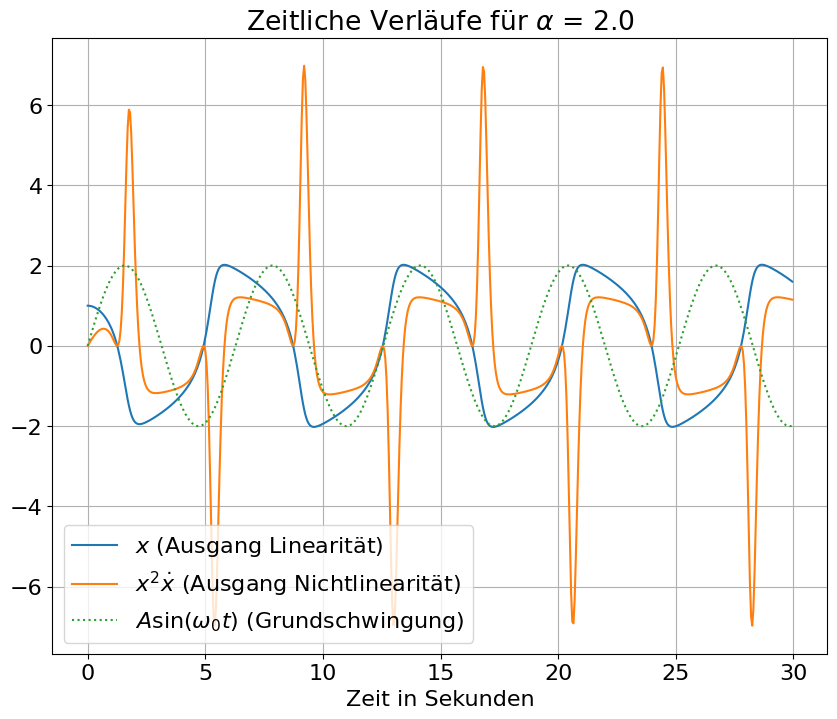

In [7]:
# %matplotlib widget
mpl.rcParams['font.size'] = '16'
mpl.figure(figsize=(10,8))
mpl.plot(t, x1, label="$x$ (Ausgang Linearität)")
mpl.plot(t, u, label="$x^2 \dot x$ (Ausgang Nichtlinearität)")
mpl.plot(t, 2 * np.sin(omega_0 * t), label="$A \sin(\omega_0 t)$ (Grundschwingung)", linestyle=":")
mpl.legend(loc="lower left")
mpl.grid()
mpl.xlabel("Zeit in Sekunden")
mpl.title("Zeitliche Verläufe für $\\alpha$ = {}".format(alpha))

Text(0.5, 1.0, 'Zustandsebene ($\\alpha$ = 2.0)')

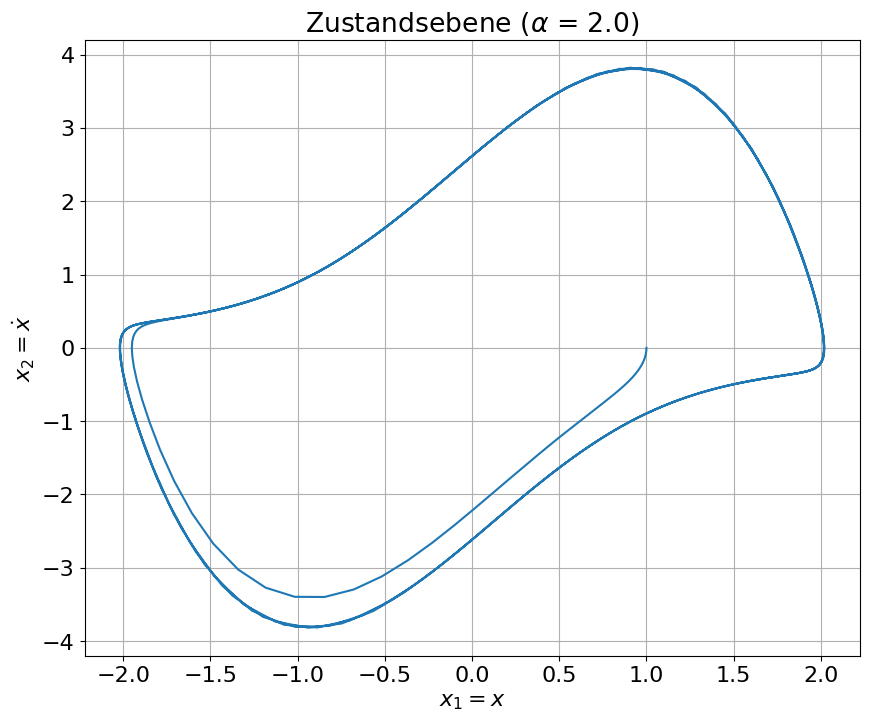

In [8]:
mpl.rcParams['font.size'] = '16'
mpl.figure(figsize=(10,8))
mpl.plot(x1, x2)
mpl.grid()
mpl.xlabel("$x_1 = x$")
mpl.ylabel("$x_2 = \dot x$")
mpl.title("Zustandsebene ($\\alpha$ = {})".format(alpha))